## Loading data

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2024-11-02 02:32:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   219MB/s    in 0.3s    

2024-11-02 02:32:57 (219 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Reading the Data into arrays

In [39]:
import os
from PIL import Image
import numpy as np

# Initialize empty arrays for training data
x_train = np.empty((100, 150, 150, 3), dtype=np.uint8)  # Use uint8 for image data
y_train = np.empty((100), dtype=int)

# Define directories
cats_dir = os.path.join(train_dir, "cats")
dogs_dir = os.path.join(train_dir, "dogs")


# Load images
i = 0
cat_index = 0
dog_index = 0

while i < 100:
    if i % 2 == 0:
        # Load and resize cat images
        im = Image.open(os.path.join(cats_dir, os.listdir(cats_dir)[cat_index])).convert("RGB").resize((150, 150))
        x_train[i] = np.array(im)  # Assign to x_train
        y_train[i] = 1  # Assign label for cat
        cat_index += 1  # Move to the next cat image
    else:
        # Load and resize dog images
        im = Image.open(os.path.join(dogs_dir, os.listdir(dogs_dir)[dog_index])).convert("RGB").resize((150, 150))
        x_train[i] = np.array(im)  # Assign to x_train
        y_train[i] = 0  # Assign label for dog
        dog_index += 1  # Move to the next dog image
    i += 1

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


<class 'PIL.Image.Image'>
Shape of x_train: (100, 150, 150, 3)
Shape of y_train: (100,)


## Beginning to define the model (this is where you come in, I loaded the pretrained model for you)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.3750 - loss: 3.7857 - val_accuracy: 0.7000 - val_loss: 0.5773
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8578 - loss: 0.3421 - val_accuracy: 0.6000 - val_loss: 0.8754
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6859 - loss: 0.9262 - val_accuracy: 1.0000 - val_loss: 0.0425
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9461 - loss: 0.0796 - val_accuracy: 1.0000 - val_loss: 0.0773
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9672 - loss: 0.0654 - val_accuracy: 0.8500 - val_loss: 0.2927
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9117 - loss: 0.1436 - val_accuracy: 0.9000 - val_loss: 0.1946
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9820 - loss: 0.0462 - val_accuracy: 1.0000 - val_loss: 0.0487
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 9/10


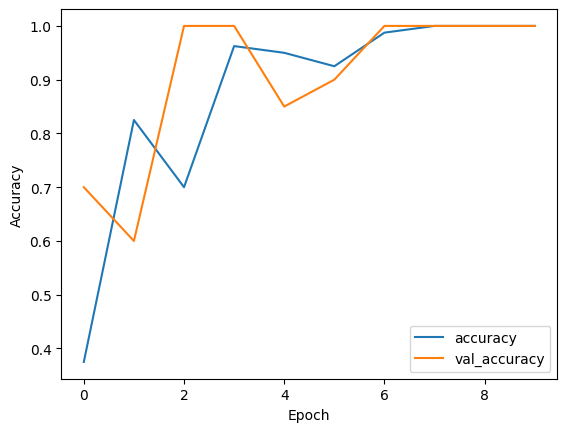

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the pretrained ResNet50 model
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    weights='imagenet'
)

# Freeze the layers in the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Build the model
resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Change to 1 neuron for binary classification

# Print the model summary to check the architecture

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the model (ensure x_train and y_train are defined and preprocessed)
epochs = 10
history = resnet_model.fit(np.array(x_train), np.array(y_train), epochs=epochs, validation_split=0.2)

# Optionally, visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [45]:
'''
#test_data = os.path.join(validation_dir)
for i in range(len(validation_dir)):
  #image = Image.open(test_data[i]).convert("RGB").resize((150, 150))
  im = Image.open(os.path.join(validation_dir, os.listdir(validation_dir)[i])).convert("RGB").resize((150, 150))
  image_array = np.array(im)
  image_array = np.expand_dims(image_array, axis=0)
  prediction = resnet_model.predict(image_array)
  print(f"Prediction for {validation_dir[i]}: {prediction}")
'''

import os
from PIL import Image
import numpy as np

# Directory containing validation images
validation_dir = "/tmp/cats_and_dogs_filtered/validation"  # Set this to your actual path
image_files = os.listdir(validation_dir)

# Loop through each subdirectory (e.g., 'cats' and 'dogs')
right = 0
total = 0
for sub_dir in os.listdir(validation_dir):
    sub_dir_path = os.path.join(validation_dir, sub_dir)
    if os.path.isdir(sub_dir_path):  # Check if it's a directory
        for image_file in os.listdir(sub_dir_path):
            # Construct the full path to the image
            image_path = os.path.join(sub_dir_path, image_file)

            # Load and preprocess the image
            im = Image.open(image_path).convert("RGB").resize((150, 150))
            image_array = np.array(im)

            # Expand dimensions to fit the model input
            image_array = np.expand_dims(image_array, axis=0)  # Shape (1, 150, 150, 3)

            # Normalize the image array
            image_array = image_array / 255.0  # Scale to [0, 1]

            # Make a prediction
            prediction = resnet_model.predict(image_array)

            # Interpret the prediction (assuming binary classification)
            predicted_class = 1 if prediction[0][0] > 0.5 else 0  # Adjust threshold as needed
            if predicted_class == 1:
                predicted_class = "dog"
            else:
                predicted_class = "cat"
            correct = str(image_file)
            correct = correct[0:3]
            print(correct)
            if predicted_class == correct:
                right += 1
            total += 1
            # Print the prediction
print("overall accuracy" + str(right/total))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
dog
1/1 ━━━━━━━